In [1]:
import pandas as pd
import numpy as np

In [2]:
movies_filtered = pd.read_csv('../Intermediate_data/filtered_movies_genre.csv',index_col= 0)

In [3]:
movies_filtered.head()

,movieId,title,releaseDate,directedBy,starring,imdbId,tmdbId,genres,Action,Adventure,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan
0,1626,Fire Down Below (1997),1997-09-05,Félix Enríquez Alcalá,"Steven Seagal, Marg Helgenberger, Stephen Lang...",119123,14289.0,"['Action', 'Drama', 'Thriller']",1,0,...,0,0,0,0,0,0,1,0,0,0
1,106491,47 Ronin (2013),2013-12-25,Carl Rinsch,"Keanu Reeves, Hiroyuki Sanada, Kô Shibasaki, R...",1335975,64686.0,"['Action', 'Adventure', 'Fantasy']",1,1,...,0,0,0,0,0,0,0,0,0,0
2,85414,Source Code (2011),2011-04-01,Duncan Jones,"Jake Gyllenhaal, Michelle Monaghan, Vera Farmi...",945513,45612.0,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Thri...",1,0,...,0,0,0,1,0,1,1,0,0,0
3,124805,Venus & Vegas (2010),2010-11-01,Demian Lichtenstein,"Eddie Kaye Thomas,Donald Faison,Eddie Guerra,J...",423474,68716.0,"['Action', 'Comedy']",1,0,...,0,0,0,0,0,0,0,0,0,0
4,144514,Quick (2011),2011-07-21,Beom-gu Cho,"Yoo Seung-Mok,Yoon Je-moon,Kim Tae-woo,Lee Min...",2007413,77175.0,"['Action', 'Comedy', 'Thriller']",1,0,...,0,0,0,0,0,0,1,0,0,0


In [27]:
movies_filtered.shape

(22351, 28)

In [50]:
train_subset  = pd.read_csv('../Intermediate_data/train_subset.csv', index_col= 0)

In [51]:
train_subset.head()

,userId,movieId,rating,timestamp,year
25352,127137,115824,4.5,2017-12-31 23:59:50,2017
25353,142748,2762,5.0,2017-12-31 23:59:41,2017
25354,196198,1198,3.5,2017-12-31 23:59:17,2017
25355,142748,71057,4.5,2017-12-31 23:58:09,2017
25356,142748,152077,5.0,2017-12-31 23:57:32,2017


In [52]:
train_subset = train_subset.reset_index()

In [137]:
train_new = train_subset.merge(movies_filtered, how = 'inner', left_on = 'movieId', right_on = 'movieId' )

In [56]:
train_new.head()

,index,userId,movieId,rating,timestamp,year,title
0,25353,142748,2762,5.0,2017-12-31 23:59:41,2017,"Sixth Sense, The (1999)"
1,26123,142752,2762,4.0,2017-12-31 20:41:29,2017,"Sixth Sense, The (1999)"
2,26180,142744,2762,4.0,2017-12-31 20:35:25,2017,"Sixth Sense, The (1999)"
3,26257,142753,2762,4.5,2017-12-31 20:19:35,2017,"Sixth Sense, The (1999)"
4,26651,142747,2762,3.0,2017-12-31 18:02:45,2017,"Sixth Sense, The (1999)"


In [54]:
train_new.shape, train_subset.shape , movies_filtered.shape

((1200795, 7), (1993188, 6), (22351, 28))

In [69]:
len(train_new['movieId'].unique()), len(train_new['userId'].unique())

(17035, 19203)

In [59]:
UM= train_new.pivot(index='userId', columns='movieId', values='rating')
UM_matrix = np.matrix(UM.values)

In [61]:
UM_matrix.

matrix([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]])

In [25]:
UM_matrix.shape

(19203, 17035)

In [62]:
from scipy.sparse import csr_matrix
UM_matrix_sparse = csr_matrix(UM.values)

In [14]:
import CollabFiltering as CF

In [17]:
p,q = CF.SVD(UM_matrix)

In [126]:
def rmse(p,q,UM):

    UM_pred =  np.dot(p,q.T)
    subt = np.subtract(UM_matrix,UM_matrix_pred)
    RMSE = np.sqrt(np.square(sub[~np.isnan(sub)]).mean())

    return(RMSE)

In [127]:
RMSE = rmse(p,q,UM_matrix)

In [128]:
RMSE

1.063593441930796

### Clustering model on the reduced dimension
Clustering at User level on p matrix

In [35]:
from sklearn.mixture import GaussianMixture as GMM

In [38]:
gmm_fit = GMM(n_components=4).fit(p)

In [40]:
prediction_gmm = gmm_fit.predict(p)
probs = gmm_fit.predict_proba(p)


In [76]:
probs[[0]]

array([[0.32093272, 0.16471966, 0.043582  , 0.47076563]])

In [87]:
user_cluster = pd.DataFrame({'userId': UM.index , 'cluster': prediction_gmm })

In [88]:
user_cluster.head()

,cluster,userId
0,3,100032
1,3,100036
2,3,100053
3,3,100057
4,3,100058


In [131]:
import matplotlib.pyplot as plt 

In [134]:
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type='full', random_state=0).fit(p)
          for n in n_components]

Text(0.5, 0, 'n_components')

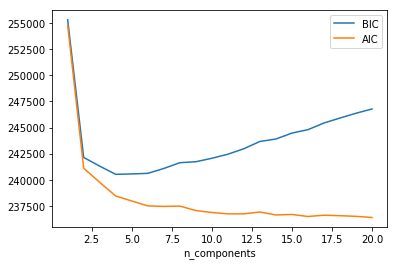

In [133]:
plt.plot(n_components, [m.bic(p) for m in models], label='BIC')
plt.plot(n_components, [m.aic(p) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

---
Merging this data to the training dataset

In [138]:
train_clusters = train_new.merge(user_cluster,how = 'left' , left_on= 'userId', right_on= 'userId')

In [139]:
train_clusters.head()

,index,userId,movieId,rating,timestamp,year,title,releaseDate,directedBy,starring,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,nan,cluster
0,25353,142748,2762,5.0,2017-12-31 23:59:41,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,1
1,26123,142752,2762,4.0,2017-12-31 20:41:29,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,3
2,26180,142744,2762,4.0,2017-12-31 20:35:25,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,0
3,26257,142753,2762,4.5,2017-12-31 20:19:35,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,0
4,26651,142747,2762,3.0,2017-12-31 18:02:45,2017,"Sixth Sense, The (1999)",1999-08-06,M. Night Shyamalan,"Haley Joel Osment, Bruce Willis, Toni Collette...",...,0,0,1,0,0,0,0,0,0,3


In [142]:
user_cluster['cluster'].value_counts()

1    6799
3    5659
0    3463
2    3282
Name: cluster, dtype: int64

In [143]:
genres_lst = ['Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

In [158]:
train_clusters.groupby('cluster')[genres_lst].sum().T/user_cluster['cluster'].value_counts()

,0,1,2,3
Action,12.867456,20.738638,18.191651,38.957236
Adventure,10.530754,18.009413,15.658135,31.593038
Animation,3.453364,6.521841,5.757770,10.946987
Children,3.210222,6.534049,5.669409,10.630677
Comedy,10.383483,17.371966,16.538087,30.851034
Crime,7.820964,9.843359,9.466484,19.660541
Documentary,0.309847,0.348139,0.557282,0.783001
Drama,15.818943,20.777761,20.659049,40.143488
Fantasy,5.663009,9.710399,8.588970,16.786181
Film-Noir,0.430263,0.386969,0.443632,1.050009


In [140]:
train_clusters.columns

Index(['index', 'userId', 'movieId', 'rating', 'timestamp', 'year', 'title',
       'releaseDate', 'directedBy', 'starring', 'imdbId', 'tmdbId', 'genres',
       'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'nan', 'cluster'],
      dtype='object')

In [150]:
user_cluster.to_csv('../Intermediate_data/user_clusters.csv')

In [152]:
train_clusters.to_csv('../../data/train_clusters.csv')